# Machine vision methods Convolutional Neural Networks

Purpose: Create a data set containing only insect pictures collected from the experiment of Ong, 2022

Author: Gabriel R. Palma

## Loading packages

In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers

# Importing section
from tensorflow.keras import models
from keras import layers
from tensorflow.keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
import numpy as np
from keras import backend as K
import os
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
# Paper Correction
from keras import metrics
# End importing section
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from scipy.io import wavfile
import pylab
from tensorflow.keras.utils import to_categorical
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32
from keras.layers import LeakyReLU
import tensorflow as tf
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam

## Functions used in this project

In [2]:
def get_images_labels_features(directory, sample_count, new_image_shape = (244, 244)):
    '''Loads and crop the images according the appropriate conditions. Also, it returns the feature and labels of the VGG16 predictions'''
        
    images = np.zeros(shape=(sample_count, new_image_shape[0], new_image_shape[1], 3))    
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,
                                            target_size = new_image_shape,
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            shuffle = True,
                                            seed=0)
    i = 0

    for inputs_batch, labels_batch in generator:
                            
        images[i * batch_size : (i + 1) * batch_size] = inputs_batch        
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1

        if i * batch_size >= sample_count:

             break
    return(images, labels)

def get_train_test_data(base_dir = 'input_data/DipteraDataset',
                        train_sample_size = 100, test_sample_size = 100, 
                        new_image_shape = (244, 244)):
    '''This function imports the dataset and split into train and test data return the features and labels of the images'''
        
    
    # Importing images data
    train_dir = os.path.join(base_dir, 'train')
    test_dir = os.path.join(base_dir, 'test')
    datagen = ImageDataGenerator(rescale=1./255)
    batch_size = 20    

    # Getting data features and labels    
    train_information = get_images_labels_features(directory = train_dir, 
                                                   sample_count = train_sample_size, 
                                                   new_image_shape = new_image_shape)    
    train_images = train_information[0]
    train_labels = train_information[1]
    
    test_information = get_images_labels_features(directory = test_dir, 
                                                  sample_count = test_sample_size, 
                                                  new_image_shape = new_image_shape)    
    test_images = test_information[0]
    test_labels = test_information[1]

    # Preparing data features    
    train_labels = to_categorical(train_labels)
    test_labels = to_categorical(test_labels)        
        
    return(train_images, train_labels, test_images, test_labels)

## Creating a simple Deep Neural Network

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(10, kernel_size=3, activation=LeakyReLU(alpha=0.3), 
               input_shape=(224, 224, 3)))
model.add(layers.Conv2D(5, kernel_size=3, activation=LeakyReLU(alpha=0.3)))
model.add(layers.MaxPool2D(2))

model.add(layers.Conv2D(10, kernel_size=3, activation=LeakyReLU(alpha=0.3)))
model.add(layers.MaxPool2D(2))

model.add(layers.Conv2D(15, kernel_size=3, activation=LeakyReLU(alpha=0.3)))
model.add(layers.MaxPool2D(2))

model.add(layers.Conv2D(15, kernel_size=3, activation=LeakyReLU(alpha=0.3)))
model.add(layers.MaxPool2D(2))

model.add(layers.Conv2D(10, kernel_size=3, activation=LeakyReLU(alpha=0.3)))
model.add(layers.MaxPool2D(2))

model.add(layers.Conv2D(5, kernel_size=3, activation=LeakyReLU(alpha=0.3)))
#model.add(layers.GlobalMaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(10, activation=LeakyReLU(alpha=0.3), input_dim=45))
model.add(layers.Dense(5, activation='softmax'))

Metal device set to: Apple M1


2024-05-30 06:43:00.687556: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-30 06:43:00.687924: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 5)       455       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 5)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      460       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 15)        1

In [5]:
model2 = models.Sequential()
model2.add(layers.Conv2D(10, kernel_size=3, activation=LeakyReLU(alpha=0.3), 
               input_shape=(224, 224, 3)))
model2.add(layers.Conv2D(5, kernel_size=3, activation=LeakyReLU(alpha=0.3)))
model2.add(layers.MaxPool2D(2))

model2.add(layers.Conv2D(10, kernel_size=3, activation=LeakyReLU(alpha=0.3)))
model2.add(layers.MaxPool2D(2))

model2.add(layers.Conv2D(15, kernel_size=3, activation=LeakyReLU(alpha=0.3)))
model2.add(layers.MaxPool2D(2))

model2.add(layers.Conv2D(15, kernel_size=3, activation=LeakyReLU(alpha=0.3)))
model2.add(layers.MaxPool2D(2))

model2.add(layers.Conv2D(10, kernel_size=3, activation=LeakyReLU(alpha=0.3)))
model2.add(layers.MaxPool2D(2))

model2.add(layers.Conv2D(5, kernel_size=3, activation=LeakyReLU(alpha=0.3)))
model2.add(layers.Flatten())
model2.add(layers.Dense(10, activation=LeakyReLU(alpha=0.3), input_dim=45))
model2.add(layers.Dense(5, activation='softmax'))

In [6]:
model3 = models.Sequential()
model3.add(layers.Conv2D(10, kernel_size=3, activation=LeakyReLU(alpha=0.3), 
               input_shape=(224, 224, 3)))
model3.add(layers.Conv2D(5, kernel_size=3, activation=LeakyReLU(alpha=0.3)))
model3.add(layers.MaxPool2D(2))

model3.add(layers.Conv2D(10, kernel_size=3, activation=LeakyReLU(alpha=0.3)))
model3.add(layers.MaxPool2D(2))

model3.add(layers.Conv2D(15, kernel_size=3, activation=LeakyReLU(alpha=0.3)))
model3.add(layers.MaxPool2D(2))

model3.add(layers.Conv2D(15, kernel_size=3, activation=LeakyReLU(alpha=0.3)))
model3.add(layers.MaxPool2D(2))

model3.add(layers.Conv2D(10, kernel_size=3, activation=LeakyReLU(alpha=0.3)))
model3.add(layers.MaxPool2D(2))

model3.add(layers.Conv2D(5, kernel_size=3, activation=LeakyReLU(alpha=0.3)))
model3.add(layers.Flatten())
model3.add(layers.Dense(10, activation=LeakyReLU(alpha=0.3), input_dim=45))
model3.add(layers.Dense(5, activation='softmax'))

## Training the models

### Obtaining images and labels

#### Original dataset

In [7]:
train_images, train_labels, test_images, test_labels = get_train_test_data(base_dir = '../../input_data/DipteraDataset/',
                                                                               train_sample_size = 2026, test_sample_size = 848, 
                                                                               new_image_shape = (224, 224))


Found 2026 images belonging to 5 classes.
Found 848 images belonging to 5 classes.


# Model performance

In [16]:
model.load_weights('CNN_original_data.h5')
model.compile(optimizer=Adam(), 
                 loss='categorical_crossentropy', 
                 metrics=["accuracy"])
print(model.evaluate(train_images, train_labels))
print(model.evaluate(test_images, test_labels))

2024-05-26 23:51:06.542287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


64/64 [==============================] - 3s 43ms/step - loss: 0.0017 - accuracy: 1.0000
[0.0016659441171213984, 1.0]
27/27 [==============================] - 2s 56ms/step - loss: 2.0793 - accuracy: 0.7524
[2.079329252243042, 0.7523584961891174]


In [9]:
cnn_predictions = tf.math.argmax(model.predict(test_images), axis=1)
cm = confusion_matrix(cnn_predictions, tf.math.argmax(test_labels, axis=1))
total_specimens = np.bincount(tf.math.argmax(test_labels, axis=1))
np.diag(cm) / total_specimens

 1/27 [>.............................] - ETA: 8s

2024-05-26 23:45:47.576540: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


27/27 [==============================] - 1s 34ms/step


array([0.1641791 , 0.90960452, 0.85034014, 0.99418605, 0.98013245])

In [10]:
total_specimens

array([201, 177, 147, 172, 151])

In [11]:
cm

array([[ 33,  16,   0,   0,   0],
       [101, 161,   0,   0,   0],
       [ 25,   0, 125,   1,   3],
       [ 42,   0,   4, 171,   0],
       [  0,   0,  18,   0, 148]])

In [12]:
101/201

0.5024875621890548

## Training CNN

#### Original data

In [8]:
callbacks = [        
    ModelCheckpoint('CNN_original_data2.h5', verbose = 1, 
                    save_best_only = True, save_weights_only = True, monitor='val_acc')
]

In [9]:
model.compile(optimizer = Adam(), loss='categorical_crossentropy', 
              metrics=['acc', metrics.Precision(), metrics.Recall()])

CNN_original_data = model.fit(train_images, train_labels, 
                    batch_size=32, epochs=30, callbacks=callbacks,
                    validation_data=(test_images, test_labels))

Epoch 1/30


2024-05-30 06:43:33.754885: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-05-30 06:43:34.430014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


64/64 [==============================] - ETA: 0s - loss: 1.5836 - acc: 0.2611 - precision: 0.0000e+00 - recall: 0.0000e+00

2024-05-30 06:43:43.492269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_acc improved from -inf to 0.23703, saving model to CNN_original_data2.h5
64/64 [==============================] - 11s 128ms/step - loss: 1.5836 - acc: 0.2611 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.5991 - val_acc: 0.2370 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
64/64 [==============================] - ETA: 0s - loss: 1.4175 - acc: 0.3796 - precision: 0.5897 - recall: 0.0844
Epoch 2: val_acc improved from 0.23703 to 0.25236, saving model to CNN_original_data2.h5
64/64 [==============================] - 7s 102ms/step - loss: 1.4175 - acc: 0.3796 - precision: 0.5897 - recall: 0.0844 - val_loss: 1.6903 - val_acc: 0.2524 - val_precision: 0.2874 - val_recall: 0.0566
Epoch 3/30
64/64 [==============================] - ETA: 0s - loss: 1.0686 - acc: 0.5439 - precision: 0.6804 - recall: 0.3332
Epoch 3: val_acc improved from 0.25236 to 0.34788, saving model to CNN_original_data2.h5
64/64 [==============================] - 6s 99ms/step - loss

64/64 [==============================] - ETA: 0s - loss: 0.0269 - acc: 0.9906 - precision: 0.9906 - recall: 0.9906
Epoch 22: val_acc did not improve from 0.70401
64/64 [==============================] - 6s 99ms/step - loss: 0.0269 - acc: 0.9906 - precision: 0.9906 - recall: 0.9906 - val_loss: 5.0065 - val_acc: 0.6804 - val_precision: 0.6809 - val_recall: 0.6769
Epoch 23/30
64/64 [==============================] - ETA: 0s - loss: 0.0534 - acc: 0.9788 - precision: 0.9802 - recall: 0.9778
Epoch 23: val_acc improved from 0.70401 to 0.70637, saving model to CNN_original_data2.h5
64/64 [==============================] - 6s 100ms/step - loss: 0.0534 - acc: 0.9788 - precision: 0.9802 - recall: 0.9778 - val_loss: 3.3970 - val_acc: 0.7064 - val_precision: 0.7095 - val_recall: 0.7028
Epoch 24/30
64/64 [==============================] - ETA: 0s - loss: 0.0140 - acc: 0.9965 - precision: 0.9965 - recall: 0.9961
Epoch 24: val_acc improved from 0.70637 to 0.72406, saving model to CNN_original_data2.h5

In [19]:
exploratory_performance = pd.DataFrame(CNN_original_data.history)
exploratory_performance.to_csv("../../output_data/CNN_original_dataset.csv")

<AxesSubplot:>

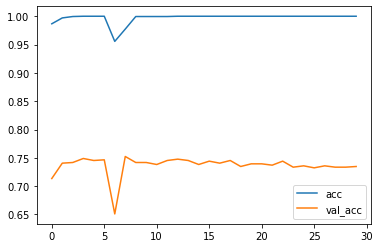

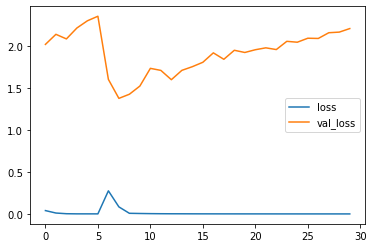

In [21]:
exploratory_performance[['acc', 'val_acc']].plot()
exploratory_performance[['loss', 'val_loss']].plot()